In [1]:
seq="ACGT"
print(seq)

ACGT


In [7]:
import random
seq =''
for _ in range(10):
    seq+=random.choice("ACGT")
print(seq)


GTGTCGACTC


In [10]:
print(random.choice("ACGT"))

A


In [12]:
seq = ''.join(random.choice("ACGT") for _ in range(100))
print(seq)

GAAGAAGTGTACTCCGGGCGCGTACGAAACACGAGAGAAGATGCCCCTTCTCGCCTCGGTCCGCCTAGCTGAGCTAGAGCGCTCACTTTAAGACGAAGAG


In [19]:
print(seq[-2:])

AG


In [105]:
def reverseComplement(s):
    complement = {'A':'T','T':'A','C':'G','G':'C'}
    reverse = ''
    for i in s:
        reverse = complement[i]+ reverse
    return reverse
print(reverseComplement('TTAA'))

TTAA


In [22]:
complement = {'A':'T','T':'A','C':'G','G':'C'}
complement['A']

'T'

In [34]:
def readGenome(filename):
    genome =''
    with open(filename,'r') as f:
        for line in f:
            if not line[0] == '>':
                genome +=line.rstrip()
    return genome
g = readGenome('lambda_virus.fa')
len(g)

48502

In [35]:
counts = {'A':0,'T':0,'C':0,'G':0}
for base in g:
    counts[base]+=1
counts

{'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986}

In [37]:
import collections
collections.Counter(g)

Counter({'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986})

In [56]:
def readFastq(filename):
    sequenses = []
    qualities = []
    with open(filename) as f:
        while True :
            f.readline()
            seq = f.readline().rstrip()
            f.readline()
            qual = f.readline().rstrip()
            if len(seq) == 0:
                break
            sequenses.append(seq)
            qualities.append(qual)
    return sequenses, qualities
seqs , quals = readFastq('SP1.fq')
print(seqs[:10])
print(quals[:10])

['TTTCCGGGGCACATAATCTTCAGCCGGGCGC', 'TATCCTTGCAATACTCTCCGAACGGGAGAGC', 'GCAGTTTAAGATCATTTTATTGAAGAGCAAG', 'GGCATTGCAAAATTTATTACACCCCCAGATC', 'CCCCCTTAAATAGCTGTTTATTTGGCCCCAG', 'TCTTGCAAAAACTCCTAGATCGGAAGAGCAC', 'TCCCCCCCCCAAATCGGAAAAACACACCCCC', 'GTCTTTGTACAAAATTTTATTAAAGGTCTTT', 'CCTTCCATCACCAGATCGGAAAAACACACGC', 'GAGTTATAATCCAATCTTTATTTAAAAATCT']
['9C;=;=<9@4868>9:67AA<9>65<=>591', '1/04.72,(003,-2-22+00-12./.-.4-', '?7?AEEC@>=1?A?EEEB9ECB?==:B.A?A', '>=2.660/?:36AD;0<14703640334-//', '8;;;>DC@DAC=B?C@9?B?CDCB@><<??A', '-/CA:+<599803./2065?6=<>90;?150', '5?:5;<02:@977=:<0=9>@5>7>;>*3,-', '?B?DEC@A=?ADDAEEEC?EC@D6A@@>DE4', '00>7;8@5<192?/8;0;;>=3=/3239713', '>=AEC?C@;??0A>?0DEB9EEB@DDC1?=6']


In [50]:
def phredQ(q):
    return ord(q) - 33
phredQ('#')

2

In [52]:
def createHist(qualities):
    hists = [0] * 50
    for qual in qualities:
        for phred in qual:
            q = phredQ(phred)
            hists[q] += 1
    return hists
h = createHist(quals)
print(h)

[0, 0, 0, 0, 0, 0, 0, 2, 9, 13, 26, 38, 63, 78, 104, 114, 125, 121, 126, 136, 130, 143, 146, 117, 158, 277, 223, 494, 691, 335, 865, 630, 551, 455, 414, 429, 737, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


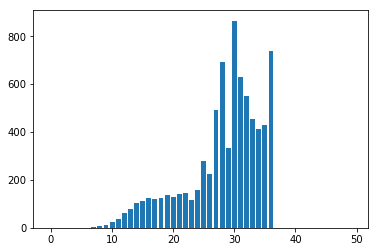

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)),h)
plt.show()


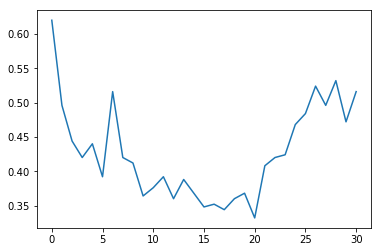

In [87]:
def findGCByPos(reads):
    gc = [0] * 31
    total = [0] * 31
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'G' or read[i] == 'C':
                gc[i] +=1
            total[i] +=1
    for i in range(len(gc)):
        if total[i]>0:
            gc[i]/=float(total[i])
    return gc

gc = findGCByPos(seqs)

plt.plot(range(len(gc)),gc)
plt.show()

# This is Tile
1. list 1.
2. list 3

adadasd

+ other list
+ other other

This is **very** important.

Any finally mind blowing one:

$\sum_{i=0}^{N} \Gamma^i$

In [91]:
import collections
counter = collections.Counter()
for seq in seqs:
    counter.update(seq)
print(counter)


Counter({'T': 2372, 'A': 2064, 'C': 2046, 'G': 1268})


In [103]:
genome = readGenome('phix.fa')

def naiveMatch(pattern, text):
    matches =[]
    for i in range(len(text)-len(pattern)+1):
        match = True
        for j in range(len(pattern)):
            if not pattern[j]== text[i+j]:
                match = False
                break
        if match:
            matches.append(i)
    return matches
        
#print(genome)
print(naiveMatch('TAGCT', genome))

[4858]
